In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [71]:
mediciones_visuales = [0.96, 1.63, 1.12, 1.15, 1.27, 1.02, 1.21, 1.4, 1.2, 1.3, 1.48, 1.03, 1.37, 0.92, 1.21, 1.17, 0.99, 1.33, 1.2, 1.18, 1.04, 1.37, 1.18, 1.17, 1.33, 1.16, 1.31, 1.12, 1.3, 0.97, 1.33, 1.11, 0.9, 0.86, 0.93, 0.98, 1.13, 1.28, 1.12, 1.28, 1.08, 1.13, 1.12, 0.97, 1.04, 0.91, 1.13, 1.11, 0.98, 1.25, 1.05, 1.29, 1.15, 1.08, 1.04, 1.21, 1.02, 1.27, 1.31, 1.22, 1.01, 1.09, 1.05, 0.98, 1.1, 1.05, 1.04, 0.93, 1.13, 1, 0.87, 1.08, 1.06, 1.33, 1.07, 0.95, 0.87, 1.01, 1.26, 1.01, 1.13, 0.88, 1.06, 1.14, 1.07, 0.84, 0.94, 1.21, 1.41, 1.06, 1.14, 1.06, 0.88, 1.07, 1.07, 0.88, 1.06, 0.95, 1.27, 1.08]
mediciones_sonoras = [1.06, 1.16, 1.25, 1.16, 1.25, 1.1, 1.13, 0.96, 1.13, 1.14, 1.18, 1.26, 1.24, 1.14, 1.04, 1.19, 1.16, 1.14, 1.12, 1.27, 1.13, 0.98, 1.15, 1.16, 1.17, 1.24, 1.15, 1.18, 1.05, 1.23, 1.07, 1.14, 1.21, 1.08, 1.15, 1.07, 1.21, 1.14, 1.01, 1.08, 1.15, 1.15, 1.07, 1.2, 0.94, 1.01, 1.21, 1.2, 1.13, 1.13, 1.08, 1.06, 1.2, 1.13, 1.07, 1.19, 1.13, 1.28, 1.06, 1, 1.01, 1.08, 1.14, 1.2, 1.08, 1.14, 1.26, 1.14, 1.2, 1.19, 1.11, 1.15, 1.15, 1.13, 1.12, 1.14, 1.15, 1.14, 1.21, 1.14, 1.12, 1.05, 1.15, 1.15, 1.14, 1.08, 1.12, 1.12, 1.2, 1.23, 1.13, 1.08, 1.04, 1.21, 1.16, 1.16, 1.16, 1.18, 1.2, 1.12]

In [72]:
data_vis = pd.DataFrame({'tiempo': mediciones_visuales})
data_vis.head()

,tiempo
0,0.96
1,1.63
2,1.12
3,1.15
4,1.27


In [73]:
data_vis.count()

tiempo    100
dtype: int64

In [74]:
def obtener_estadisticas(data):
    media = data.mean().values
    moda = data.mode().values.flatten()
    desviacion = data.std().values
    N = len(data)
    errorEstandar = desviacion / np.sqrt(N)
    minimo = data.min().values
    maximo = data.max().values
    mediana = data.median().values
    rango = maximo - minimo
    
    return {'media': media,
            'moda': moda,
            'desviacion': desviacion,
            'N': N,
            'errorEstandar': errorEstandar,
            'minimo': minimo,
            'maximo': maximo,
            'mediana': mediana,
            'rango': rango}


In [75]:
def graficar(data, titulo, mult = 1):
    s = obtener_estadisticas(data)

    # Ancho de los bins usando el Criterio de Scott
    bin_width = 3.49 * s["desviacion"] / np.power(s["N"], 1/3)

    # Numero de bins
    bin_count = int(mult * s["rango"] / bin_width)

    plt.hist(data, bins=bin_count, edgecolor='black', density=True)

    # Add vertical line at the mean, mediana, mode, minimo, maximo
    plt.axvline(s["media"], color='r', linestyle='dashed', linewidth=2,
                label=f'media: {s["media"][0]:.2f}')
    for m in s["moda"]:
        plt.axvline(m, color='g', linestyle='dashed', linewidth=2, label=f'moda: {m:.2f}')
    plt.axvline(s["mediana"], color='b', linestyle='dashed', linewidth=2, label=f'mediana: {s["mediana"][0]:.2f}')
    plt.axvline(s["minimo"], color='y', linestyle='dashed', linewidth=2, label=f'mínimo: {s["minimo"][0]:.2f}')
    plt.axvline(s["maximo"], color='y', linestyle='dashed', linewidth=2, label=f'máximo: {s["maximo"][0]:.2f}')

    plt.xlabel('Valor')
    plt.ylabel('Frecuencia relativa')
    plt.title(titulo)
    plt.legend()
    plt.show()

In [76]:
N = 20
data_vis_20 = data_vis.iloc[:N]

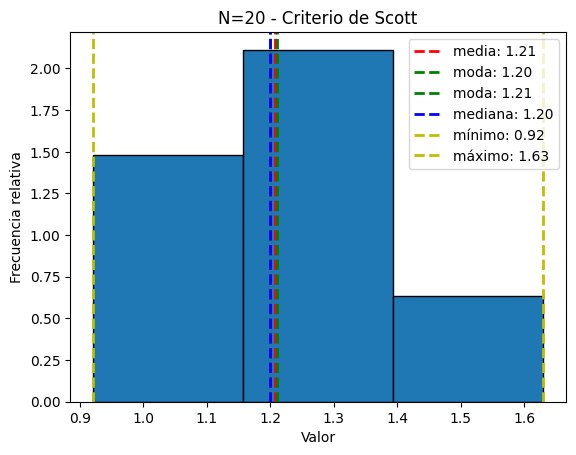

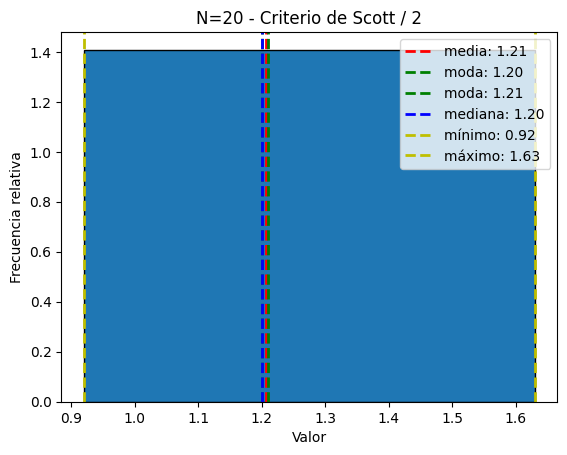

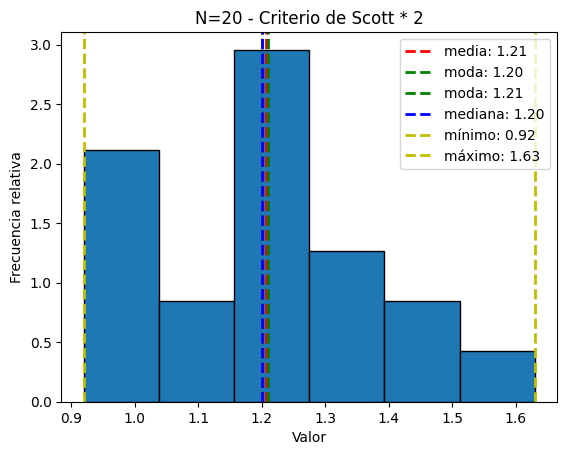

In [77]:
graficar(data_vis_20,
         titulo=f'Mediciones Visuales - N={N} - Criterio de Scott')

graficar(data_vis_20,
         titulo=f'Mediciones Visuales - N={N} - Criterio de Scott / 2',
         mult=0.5)

graficar(data_vis_20,
         titulo=f'Mediciones Visuales - N={N} - Criterio de Scott * 2',
         mult=2)

In [78]:
N = 60
data_vis_60 = data_vis.iloc[:N]

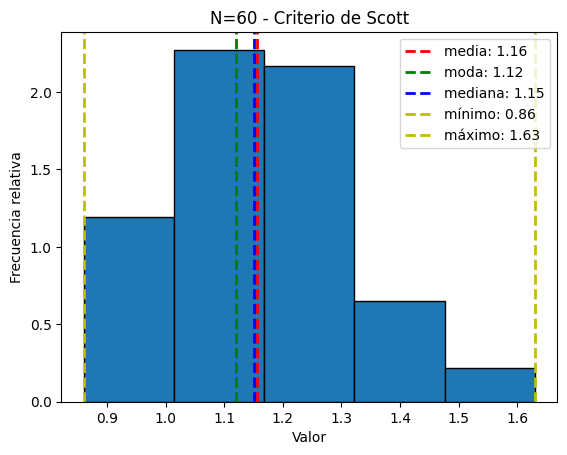

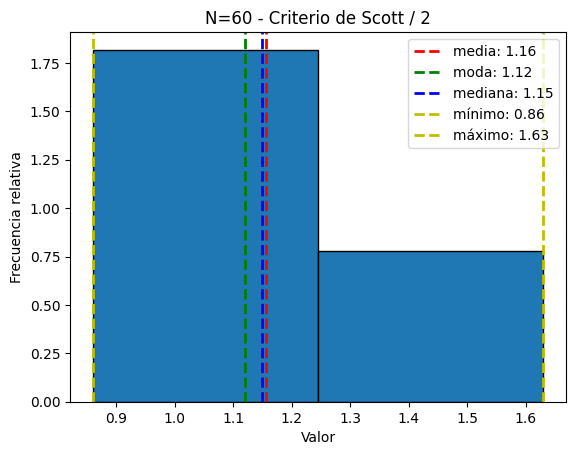

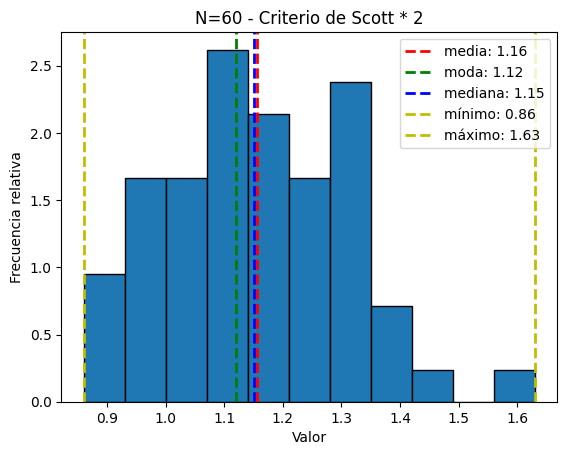

In [79]:
graficar(data_vis_60,
         titulo=f'Mediciones Visuales - N={N} - Criterio de Scott')

graficar(data_vis_60,
         titulo=f'Mediciones Visuales - N={N} - Criterio de Scott / 2',
         mult=0.5)

graficar(data_vis_60,
         titulo=f'Mediciones Visuales - N={N} - Criterio de Scott * 2',
         mult=2)

In [80]:
N = 100
data_vis_100 = data_vis.iloc[:N]

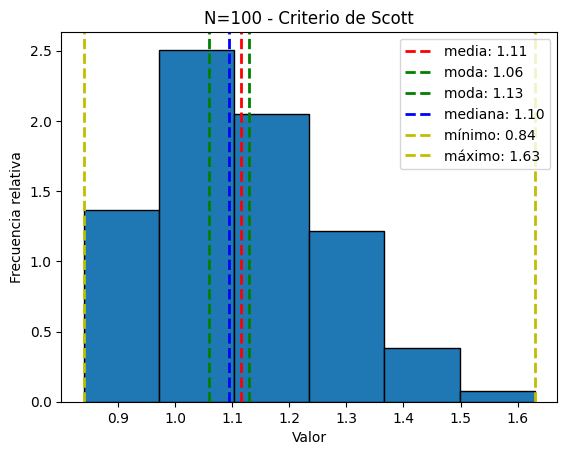

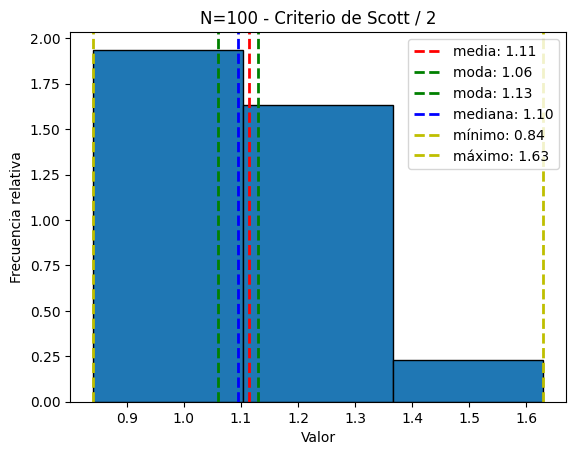

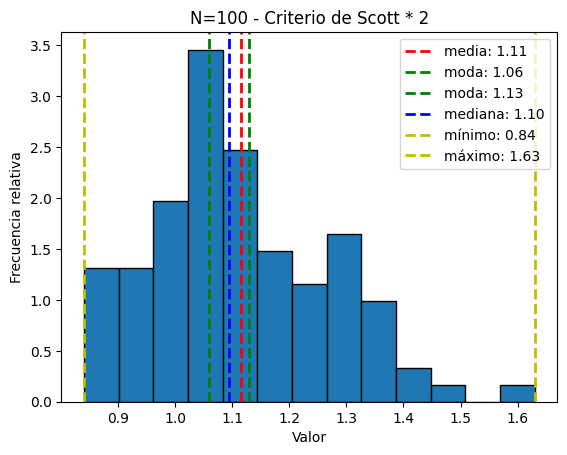

In [81]:
graficar(data_vis_100,
         titulo=f'Mediciones Visuales - N={N} - Criterio de Scott')

graficar(data_vis_100,
         titulo=f'Mediciones Visuales - N={N} - Criterio de Scott / 2',
         mult=0.5)

graficar(data_vis_100,
         titulo=f'Mediciones Visuales - N={N} - Criterio de Scott * 2',
         mult=2)

In [82]:
stats = obtener_estadisticas(data_vis_100)
errorAbsolutoTotalVisuales = np.sqrt(0.01**2 + stats['errorEstandar']**2)

print("Error absoluto total:", errorAbsolutoTotalVisuales.round(4).item())

Error absoluto total: 0.0182


### Actividad 1B

In [83]:
data_son = pd.DataFrame({'tiempo': mediciones_sonoras})
data_son.head()

,tiempo
0,1.06
1,1.16
2,1.25
3,1.16
4,1.25


In [84]:
N = 20
data_son_20 = data_son.iloc[:N]

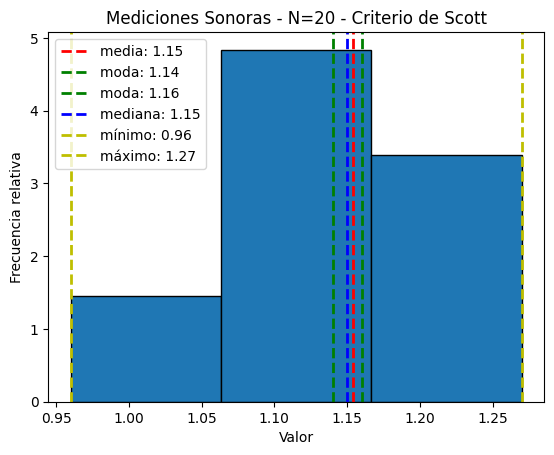

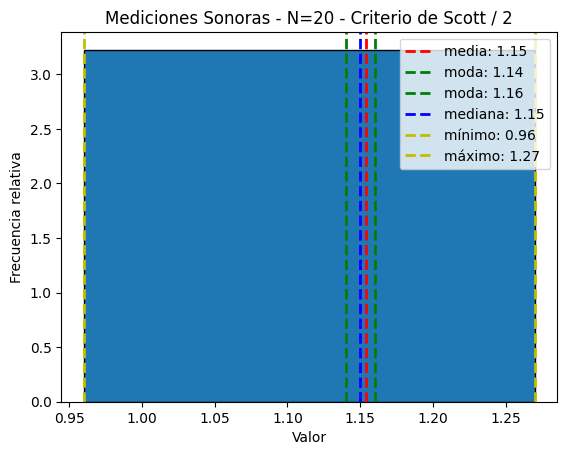

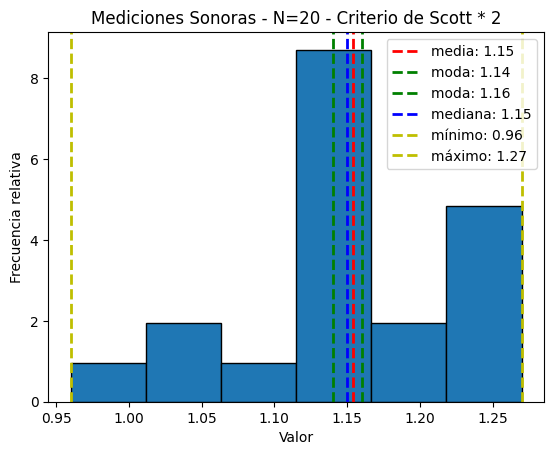

In [85]:
graficar(data_son_20,
         titulo=f'Mediciones Sonoras - N={N} - Criterio de Scott')

graficar(data_son_20,
         titulo=f'Mediciones Sonoras - N={N} - Criterio de Scott / 2',
         mult=0.5)

graficar(data_son_20,
         titulo=f'Mediciones Sonoras - N={N} - Criterio de Scott * 2',
         mult=2)

In [86]:
N = 60
data_son_60 = data_son.iloc[:N]

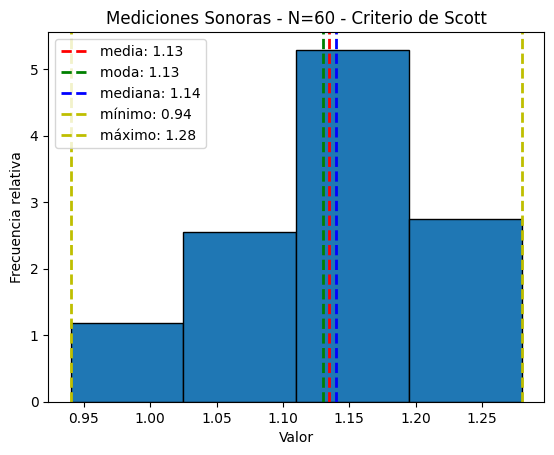

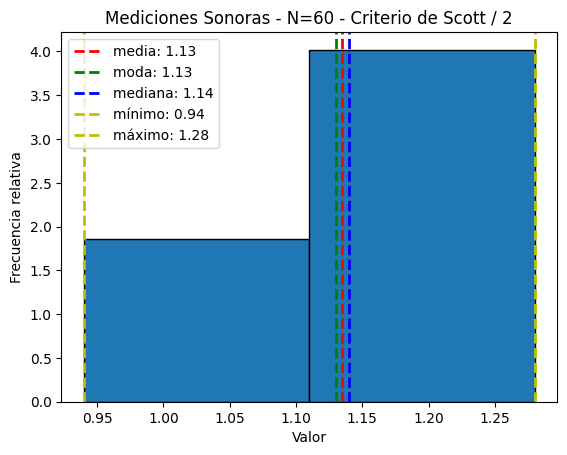

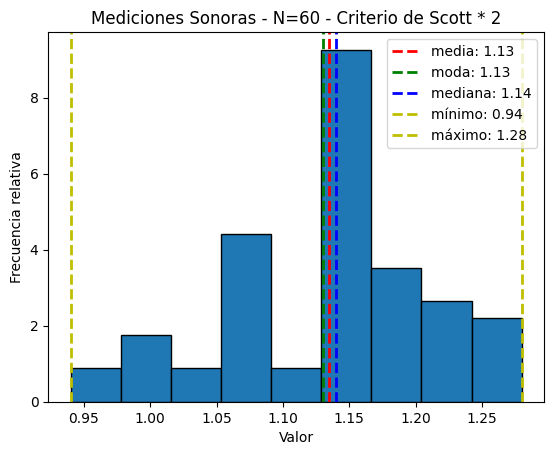

In [87]:
graficar(data_son_60,
         titulo=f'Mediciones Sonoras - N={N} - Criterio de Scott')

graficar(data_son_60,
         titulo=f'Mediciones Sonoras - N={N} - Criterio de Scott / 2',
         mult=0.5)

graficar(data_son_60,
         titulo=f'Mediciones Sonoras - N={N} - Criterio de Scott * 2',
         mult=2)

In [88]:
N = 100
data_son_100 = data_son.iloc[:N]

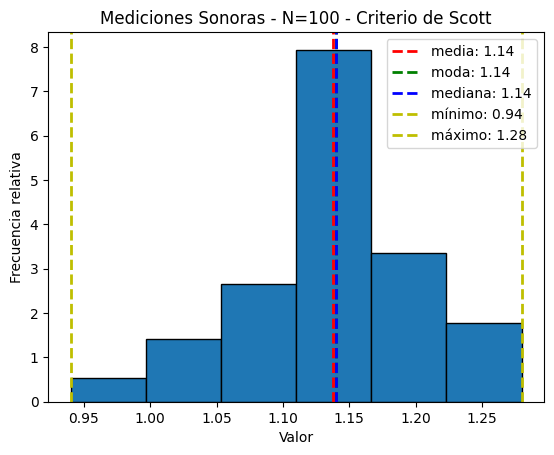

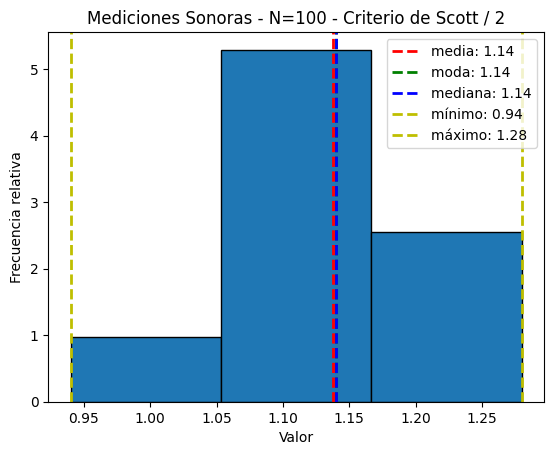

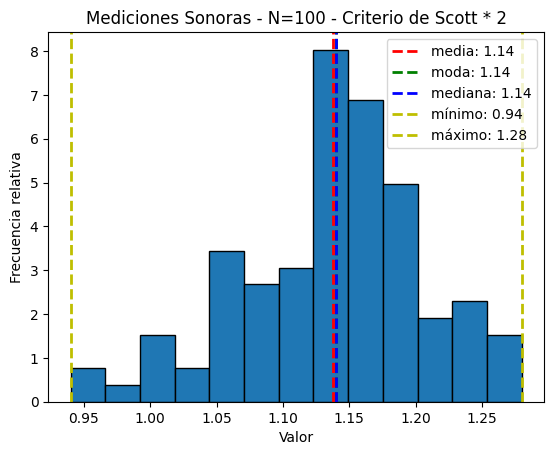

In [89]:
graficar(data_son_100,
         titulo=f'Mediciones Sonoras - N={N} - Criterio de Scott')

graficar(data_son_100,
         titulo=f'Mediciones Sonoras - N={N} - Criterio de Scott / 2',
         mult=0.5)

graficar(data_son_100,
         titulo=f'Mediciones Sonoras - N={N} - Criterio de Scott * 2',
         mult=2)

In [90]:
stats = obtener_estadisticas(data_son_100)
errorAbsolutoTotalSonoras = np.sqrt(0.01**2 + stats['errorEstandar']**2)

print("Error absoluto total:", errorAbsolutoTotalSonoras.round(4).item())

Error absoluto total: 0.0121


Comparamos mediociones visuales con sonoras:

In [91]:
print("Error absoluto: mediciones visuales vs sonoras")
print("Visuales:", errorAbsolutoTotalVisuales.round(4).item())
print("Sonoras:", errorAbsolutoTotalSonoras.round(4).item())
print("Diferencia:", np.abs(errorAbsolutoTotalVisuales - errorAbsolutoTotalSonoras).round(4).item())

Error absoluto: mediciones visuales vs sonoras
Visuales: 0.0182
Sonoras: 0.0121
Diferencia: 0.0061


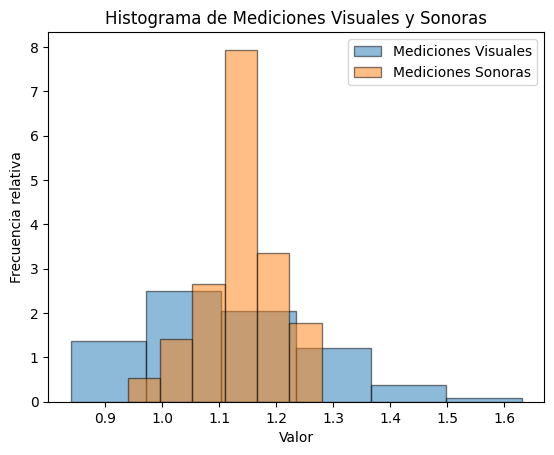

In [94]:
s = obtener_estadisticas(data_vis)
bin_width = 3.49 * s["desviacion"] / np.power(s["N"], 1/3)
bin_count = int(s["rango"] / bin_width)
plt.hist(data_vis['tiempo'], bins=bin_count, edgecolor='black', alpha=0.5, label='Mediciones Visuales', density=True)

s = obtener_estadisticas(data_son)
bin_width = 3.49 * s["desviacion"] / np.power(s["N"], 1/3)
bin_count = int(s["rango"] / bin_width)
plt.hist(data_son['tiempo'], bins=bin_count, edgecolor='black', alpha=0.5, label='Mediciones Sonoras', density=True)

plt.xlabel('Valor')
plt.ylabel('Frecuencia relativa')
plt.title('Histograma de Mediciones Visuales y Sonoras')
plt.legend()
plt.show()